<b>Deep Learning LAB-10

<b>Name: </b> Nikhil V

<b>Roll No: </b> CH.EN.U4AIE22038

<b>Lab -10 : </b> Auto_Encoders

In [3]:
# Modules used for data handling
import pandas as pd
import numpy as np
from numpy import expand_dims

# Modules used for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Module used to perform random choice from an iterable
import random as r

# Modules used to build the MLP architecture
import keras
from keras.utils import to_categorical  # Updated import
from keras.models import Sequential 
from keras.layers import Dense, Activation, MaxPooling2D, Conv2D, UpSampling2D, Input
from keras.datasets import mnist

sns.set_style()



In [4]:
class Dataset:
    
    def __init__(self):
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None

    def load_dataset(self):
        (self.x_train, self.y_train), (self.x_test, self.y_test) = mnist.load_data()
    
    def show_samples(self):
        rows = 3
        columns = 8
        fig, axs = plt.subplots(rows, columns,figsize=(8,8))
        for i in range(rows):
            for j in range(columns):
                axs[i,j].imshow(r.choice(self.x_train),cmap='gray')
        fig.suptitle("Image Samples of MNIST dataset")
        plt.subplots_adjust(bottom=0.5, top=0.9, hspace=0)
        plt.show()

In [5]:
d = Dataset()

In [6]:
d.load_dataset()

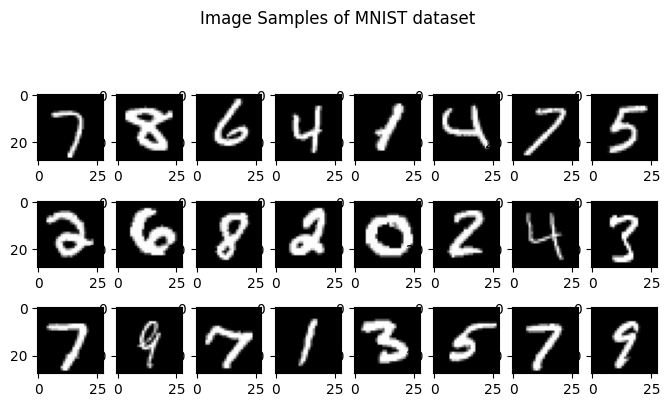

In [7]:
d.show_samples()

In [13]:
# Import necessary libraries
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

class Autoencoder:

    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_test = y_test
        self.y_train = y_train
        self.x_test = x_test
        self.IMG_DIM = (28, 28, 1)
        self.x = None

    def design_encoder(self):
        self.input = Input(shape=(28, 28, 1))  
        self.x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(self.input)
        self.x = MaxPooling2D(pool_size=(2, 2), padding='same')(self.x)

        self.x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(self.x)
        self.x = MaxPooling2D(pool_size=(2, 2), padding='same')(self.x) 

        self.x = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(self.x)
        self.encoded = MaxPooling2D(pool_size=(2, 2), padding='same')(self.x)
    
    def design_decoder(self):
        self.x = Conv2D(8, (3, 3), activation='relu', padding='same')(self.encoded)
        self.x = UpSampling2D((2, 2))(self.x)

        self.x = Conv2D(8, (3, 3), activation='relu', padding='same')(self.x)
        self.x = UpSampling2D((2, 2))(self.x)

        self.x = Conv2D(16, (3, 3), activation='relu')(self.x)
        self.x = UpSampling2D((2, 2))(self.x)
        self.decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(self.x)
    
    def compile_model(self):
        self.model = keras.models.Model(self.input, self.decoded)
        self.model.compile(optimizer='adadelta', loss='binary_crossentropy')
    
    def fit_model(self):
        self.model.fit(self.x_train, self.x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(self.x_test, self.x_test)
        )

# Create an instance of the Autoencoder class
autoencoder = Autoencoder(x_train, y_train, x_test, y_test)

# Design encoder and decoder
autoencoder.design_encoder()
autoencoder.design_decoder()

# Compile the model
autoencoder.compile_model()

# Fit the model
autoencoder.fit_model()





Epoch 1/10

469/469 [==============================] - 6s 11ms/step - loss: 0.6932 - val_loss: 0.6924
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6913 - val_loss: 0.6901
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6882 - val_loss: 0.6858
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.6813 - val_loss: 0.6751
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.6603 - val_loss: 0.6379
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.5843 - val_loss: 0.5180
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4874 - val_loss: 0.4800
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4718 - val_loss: 0.4708
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4630 - val_loss: 0.4624
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4551 - va

In [14]:
a = Autoencoder(d.x_train, d.y_train, d.x_test, d.y_test)

In [15]:
a.design_encoder()

In [16]:
a.design_decoder()

In [17]:
a.compile_model()

In [18]:
a.fit_model()

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: -23.7760 - val_loss: -55.9309
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: -319.2625 - val_loss: -493.6957
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: -492.0484 - val_loss: -501.1791
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: -494.2127 - val_loss: -501.6385
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: -494.5296 - val_loss: -501.9044
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: -494.8295 - val_loss: -502.2303
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: -495.1745 - val_loss: -502.5960
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: -495.5480 - val_loss: -502.9778
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: -495.9237 - val_loss: -503.3412
Epoch 10/10
469/469 [==================

313/313 [==============================] - 1s 2ms/step


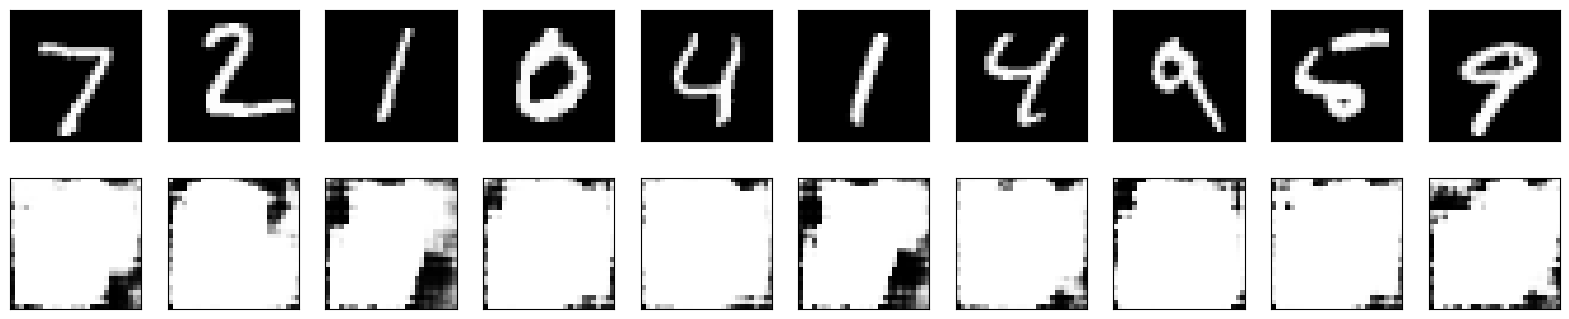

In [19]:
decoded_imgs = a.model.predict(a.x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(a.x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()